In [1]:
# Determine if running in Google Colab
try:
    import google.colab
    from google.colab import drive
    drive.mount('/content/drive')
    ROOT_DIR = '/content/drive/MyDrive'
    COLAB = True
except:
    ROOT_DIR = '..'
    COLAB = False

In [2]:
def get_path(relative_path):
    return '{}/{}'.format(ROOT_DIR, relative_path)


def summarize_df(df):
    display(df.head())
    print('Number of rows: {}'.format(len(df)))

In [3]:
if COLAB:
    !pip install geopandas

In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
from shapely.geometry import Point
import geopy.distance
from geopy import distance
from geopy import Point
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import json
import urllib
import urllib.request

# spatial join

In [7]:
st = pd.read_csv(get_path('data/exports/stations_washington_dc.csv'))
summarize_df(st)

,station_id,lat,lng
0,31267,38.908147,-77.038370
1,31250,38.903552,-77.044822
2,31224,38.903723,-77.042440
3,31221,38.905062,-77.041768
4,31212,38.905726,-77.047290


Number of rows: 324


In [8]:
dem = gpd.read_file(get_path('data/shapefiles/dem/DC_final_DEM.shp'))
summarize_df(dem)

,DN,geometry
0,108,"POLYGON ((-77.19001 39.03013, -77.18956 39.030..."
1,101,"POLYGON ((-77.18876 39.03013, -77.18867 39.030..."
2,100,"POLYGON ((-77.18867 39.03013, -77.18858 39.030..."
3,101,"POLYGON ((-77.18813 39.03013, -77.18795 39.030..."
4,105,"POLYGON ((-77.18777 39.03013, -77.18768 39.030..."


Number of rows: 960022


In [9]:
geometry = gpd.points_from_xy(st.lng, st.lat)
gdf_dt = gpd.GeoDataFrame(st, geometry=geometry).set_crs('EPSG:4326')
gdf_dt.head()

,station_id,lat,lng,geometry
0,31267,38.908147,-77.038370,POINT (-77.03837 38.90815)
1,31250,38.903552,-77.044822,POINT (-77.04482 38.90355)
2,31224,38.903723,-77.042440,POINT (-77.04244 38.90372)
3,31221,38.905062,-77.041768,POINT (-77.04177 38.90506)
4,31212,38.905726,-77.047290,POINT (-77.04729 38.90573)


<AxesSubplot:>

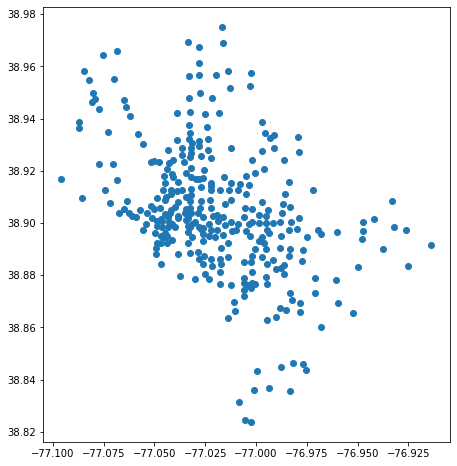

In [10]:
gdf_dt.plot(figsize=(8,8))

In [11]:
gdf_dt.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
dem.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
dt_join2 = gpd.sjoin(gdf_dt, dem, op='within')
summarize_df(dt_join2)

,station_id,lat,lng,geometry,index_right,DN
0,31267,38.908147,-77.038370,POINT (-77.03837 38.90815),556590,22
156,31298,38.905414,-77.034643,POINT (-77.03464 38.90541),556590,22
1,31250,38.903552,-77.044822,POINT (-77.04482 38.90355),560395,15
2,31224,38.903723,-77.042440,POINT (-77.04244 38.90372),563723,17
3,31221,38.905062,-77.041768,POINT (-77.04177 38.90506),563723,17


Number of rows: 324


In [14]:
dt_join2 = dt_join2[dt_join2['station_id'].notnull()]
dt_join2_csv = dt_join2[['station_id', 'lat', 'lng', 'DN']].copy()
dt_join2_csv.rename(columns={'DN': 'elevation'}, inplace=True)
dt_join2_csv.to_csv(get_path('data/exports/DC_ele_single station.csv'), index=False)